### 讀取大盤資料

In [3]:
from finlab.data import Data

data = Data()

twii = data.get("發行量加權股價指數")

twii = twii['台股指數']

twii.head()

date
2019-01-02 09:00:00    9727.41
2019-01-02 09:00:05    9725.27
2019-01-02 09:00:10    9730.34
2019-01-02 09:00:15    9724.78
2019-01-02 09:00:20    9730.49
Name: 台股指數, dtype: float64

### 整理加權指數 1分k

In [4]:
twii.index.second # 找到index的date秒針等於0的資料 --> 統一每分鐘

Int64Index([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45,
            ...
            15, 20, 25, 30, 35, 40, 45, 50, 55,  0],
           dtype='int64', name='date', length=531524)

In [5]:
twii = twii[twii.index.second == 0]

### 畫的更美一點

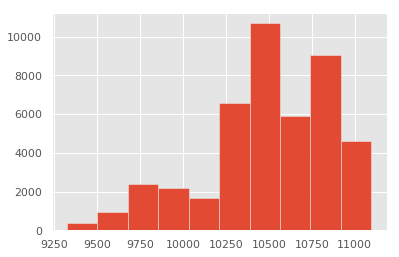

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.style.use('ggplot')

twii.hist()
# twii.plot()

### DataFrame 小教室：groupby

In [7]:
import pandas as pd

s = pd.Series([1,2,3,4,5,6])
s.groupby([0,1,0,1,0,1]).prod()

0    15
1    48
dtype: int64

In [8]:
df = pd.DataFrame({'a':s, 'b':s})
df
df.groupby([1,2,1,2,1,2]).prod()

,a,b
1,15,15
2,48,48


In [9]:
twii.head()

date
2019-01-02 09:00:00    9727.41
2019-01-02 09:01:00    9737.68
2019-01-02 09:02:00    9731.54
2019-01-02 09:03:00    9727.67
2019-01-02 09:04:00    9729.62
Name: 台股指數, dtype: float64

### 每月漲跌

In [45]:
# 會by index去group
# by年月的"起始價格"
first_price = twii.groupby([twii.index.year, twii.index.month]).first()
# 月末價格
last_price = twii.groupby([twii.index.year, twii.index.month]).last()
# 除起來大於1 --> 漲；反之為跌
profit = last_price/ first_price
profit

date  date
2019  1       1.021059
      2       1.046003
      3       1.024244
      4       1.030701
      5       0.957216
      6       1.022131
      7       1.008665
      8       0.980990
      9       1.015313
Name: 台股指數, dtype: float64

In [46]:
# pivot成寬資料
# 直接把index的level取出來命名
profit.index.levels[0].name = "year"
profit.index.levels[1].name = "month"
print(profit)
profit = profit.reset_index()
print(profit)

year  month
2019  1        1.021059
      2        1.046003
      3        1.024244
      4        1.030701
      5        0.957216
      6        1.022131
      7        1.008665
      8        0.980990
      9        1.015313
Name: 台股指數, dtype: float64
   year  month      台股指數
0  2019      1  1.021059
1  2019      2  1.046003
2  2019      3  1.024244
3  2019      4  1.030701
4  2019      5  0.957216
5  2019      6  1.022131
6  2019      7  1.008665
7  2019      8  0.980990
8  2019      9  1.015313


In [50]:
profit.pivot("year","month")["台股指數"] # 再去一層level

month,1,2,3,4,5,6,7,8,9
year,,,,,,,,,
2019,1.021059,1.046003,1.024244,1.030701,0.957216,1.022131,1.008665,0.98099,1.015313


In [43]:
start_price = twii.groupby([twii.index.year, twii.index.month]).first()
last_price = twii.groupby([twii.index.year, twii.index.month]).last()
profit = (last_price/start_price)

profit.index.levels[0].name = 'year'
profit.index.levels[1].name = 'month'
print(profit)
profit = profit.reset_index()
profit = profit.pivot("year","month")#['台股指數']
profit
#profit

year  month
2019  1        1.021059
      2        1.046003
      3        1.024244
      4        1.030701
      5        0.957216
      6        1.022131
      7        1.008665
      8        0.980990
      9        1.015313
Name: 台股指數, dtype: float64


台股指數                                                              \
month         1         2         3         4         5         6         7   
year                                                                          
2019   1.021059  1.046003  1.024244  1.030701  0.957216  1.022131  1.008665   

                          
month        8         9  
year                      
2019   0.98099  1.015313

### 每月漲跌色溫圖

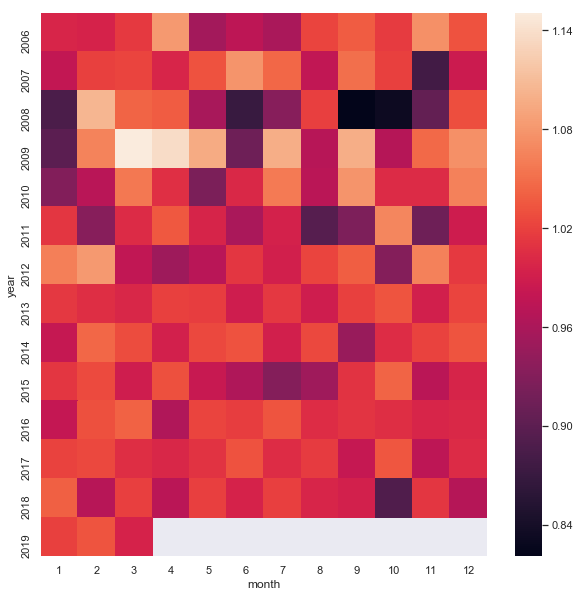

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(profit)

### 均線分析

In [53]:
import pandas as pd

# 每日開盤價
twii_daily = twii.groupby(twii.index.date).first()
twii_daily.index = pd.to_datetime(twii_daily.index)

twii_daily

2019-01-02     9727.41
2019-01-03     9554.14
2019-01-04     9492.42
2019-01-07     9382.51
2019-01-08     9590.30
2019-01-09     9563.60
2019-01-10     9738.31
2019-01-11     9720.69
2019-01-14     9759.40
2019-01-15     9708.22
2019-01-16     9806.04
2019-01-17     9763.81
2019-01-18     9789.15
2019-01-21     9836.06
2019-01-22     9889.40
2019-01-23     9894.66
2019-01-24     9846.40
2019-01-25     9877.12
2019-01-28     9969.61
2019-01-29    10013.33
2019-01-30     9931.59
2019-02-11     9932.26
2019-02-12    10004.25
2019-02-13    10097.74
2019-02-14    10090.58
2019-02-15    10089.01
2019-02-18    10064.78
2019-02-19    10145.28
2019-02-20    10152.26
2019-02-21    10272.46
                ...   
2019-07-26    10941.41
2019-07-29    10891.98
2019-07-30    10885.73
2019-07-31    10830.90
2019-08-01    10823.81
2019-08-02    10731.75
2019-08-05    10549.04
2019-08-06    10423.41
2019-08-07    10394.75
2019-08-08    10386.18
2019-08-12    10494.49
2019-08-13    10472.36
2019-08-14 

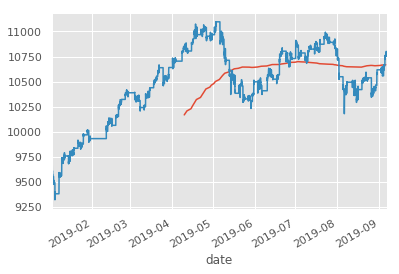

In [62]:
# 60日平均
twii_average = twii_daily.rolling(60).mean()
twii_average['2019'].plot()
twii['2019'].plot()

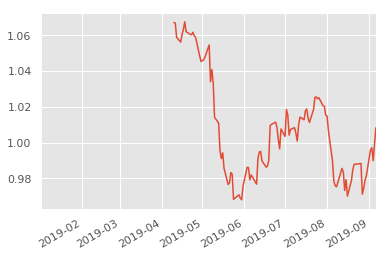

In [64]:
# 乖離率
twii_bias = twii_daily / twii_average
twii_bias.plot()

In [67]:
# 後60日漲跌
twii_profit = twii_daily.shift(-60) / twii_daily
twii_profit

2019-01-02    1.117270
2019-01-03    1.131318
2019-01-04    1.138308
2019-01-07    1.159135
2019-01-08    1.139469
2019-01-09    1.149908
2019-01-10    1.125659
2019-01-11    1.128366
2019-01-14    1.125859
2019-01-15    1.135706
2019-01-16    1.124576
2019-01-17    1.130692
2019-01-18    1.118838
2019-01-21    1.112138
2019-01-22    1.109039
2019-01-23    1.112165
2019-01-24    1.126940
2019-01-25    1.103269
2019-01-28    1.102063
2019-01-29    1.090917
2019-01-30    1.080760
2019-02-11    1.078605
2019-02-12    1.055380
2019-02-13    1.041743
2019-02-14    1.046591
2019-02-15    1.038220
2019-02-18    1.031727
2019-02-19    1.024951
2019-02-20    1.030756
2019-02-21    1.017986
                ...   
2019-07-26         NaN
2019-07-29         NaN
2019-07-30         NaN
2019-07-31         NaN
2019-08-01         NaN
2019-08-02         NaN
2019-08-05         NaN
2019-08-06         NaN
2019-08-07         NaN
2019-08-08         NaN
2019-08-12         NaN
2019-08-13         NaN
2019-08-14 

In [68]:
# 每日開盤價
twii_daily = twii.groupby(twii.index.date).first()
twii_daily.index = pd.to_datetime(twii_daily.index)

# 60日平均
twii_average = twii_daily.rolling(60).mean()

# 乖離率
twii_bias = twii_daily / twii_average

# 後60日漲跌
twii_profit = twii_daily.shift(-60) / twii_daily

# 將資料合併（方便之後做圖）
df = pd.DataFrame({
    'price': twii_daily,
    'sma': twii_average,
    'bias': twii_bias,
    'profit': twii_profit,
    'year': twii_daily.index.year,
})

# 刪除NaN
df = df.dropna(how='any')
df.head()

,price,sma,bias,profit,year
2019-04-10,10851.60,10168.513167,1.067177,0.993024,2019
2019-04-11,10868.14,10187.525333,1.066809,0.992417,2019
2019-04-12,10808.77,10208.435833,1.058808,0.994676,2019
2019-04-15,10805.30,10230.317167,1.056204,0.990512,2019
2019-04-16,10875.60,10255.202000,1.060496,0.992909,2019


### 乖離率做圖

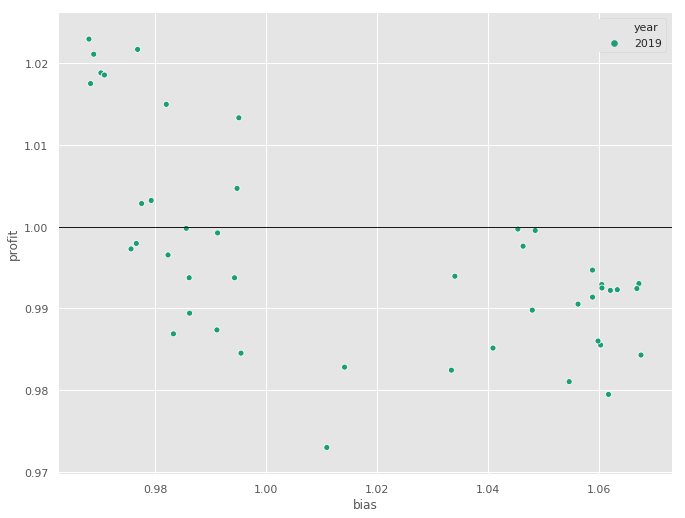

In [76]:
fig, ax = plt.subplots(figsize=(11, 8.5))
sns.scatterplot(x="bias", y="profit", data=df.tail(200), hue="year", palette="Dark2", legend="full")
ax.axhline(y=1.0, color='k', linewidth=1)

# 乖離率越高 --> 股價越可能往下走 (收盤價 < 開盤價)

# 乖離率1.04: 比均線高4%的時候，股價加權指數傾向於下跌
# 乖離率0.98: 比均線低2%的時候，股價加權指數傾向於上漲

### 查看當前的乖離率

In [77]:
twii_bias.tail()

2019-09-02    0.995921
2019-09-03    0.997145
2019-09-04    0.989971
2019-09-05    0.999186
2019-09-06    1.008303
Name: 台股指數, dtype: float64